<a href="https://colab.research.google.com/github/in-seixas/in-seixas_data_science-/blob/master/PepBase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive


In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
os.chdir('/content/gdrive/My Drive')

In [6]:
os.listdir()

['master.csv',
 'DistribuicaoCloroquinaOseltamivir.xlsx',
 'Colab Notebooks',
 'modelo_de_relatorio.pdf',
 '__MACOSX',
 'relatorios',
 'Modulo_3.notebooks',
 'medicamento.txt',
 'Lista de exercícios 7 - Variáveis - Operadores.pdf',
 'controle_da_empresa.xlsx',
 'Pepbase.csv']

In [7]:
pep = pd.read_csv('/content/gdrive/My Drive/Pepbase.csv', None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [8]:
pep.head()

,Unnamed: 0,affinity_measure,affinity_value,ligand_chain,ligand_id,ligand_resid,ligand_smiles,pdb_id,type,apo95_pdb_id
0,0,Ki,4560.0,C,GLY TYR GLU ASN PRO THR TYR LYS PHE PHE,3,O=C(NC(C(=O)NC(C(=O)NC(C(=O)NC(C=O)Cc1ccccc1)C...,1AQC,ligand,NaN
1,1,Kd,90000.0,P,PRO PRO PRO PRO PRO PRO PRO PRO PRO PRO,1,O=C([O-])C1N(C(=O)C2N(C(=O)C3N(C(=O)C4N(C(=O)C...,1AWI,ligand,NaN
2,2,Kd,90000.0,P,PRO PRO PRO PRO PRO PRO PRO PRO PRO PRO,1,O=C([O-])C1N(C(=O)C2N(C(=O)C3N(C(=O)C4N(C(=O)C...,1AWI,ligand,4X25
3,3,Kd,1900.0,B,PRO PRO PRO ALA LEU PRO PRO LYS LYS ARG,1,O=C(NC(CCCC[N+H3])[C-H2])C(NC(=O)C1N(C(=O)C2N(...,1CKA,ligand,NaN
4,4,Kd,25.0,P,SER HIS PHE ASN GLU TYR GLU,1,O=C([O-])C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(...,1E4W,ligand,NaN


In [9]:
pep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        189 non-null    int64  
 1   affinity_measure  189 non-null    object 
 2   affinity_value    189 non-null    float64
 3   ligand_chain      189 non-null    object 
 4   ligand_id         189 non-null    object 
 5   ligand_resid      189 non-null    int64  
 6   ligand_smiles     180 non-null    object 
 7   pdb_id            189 non-null    object 
 8   type              189 non-null    object 
 9   apo95_pdb_id      66 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 14.9+ KB


In [10]:
afinidade = pep['affinity_measure'].value_counts()

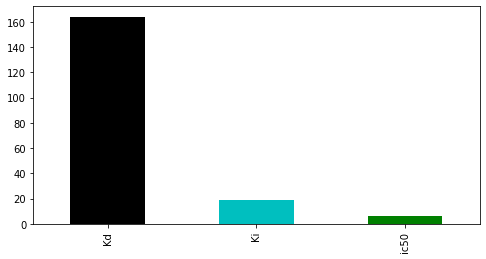

In [ ]:
colors_bar = ['k', 'c', 'g']
plt.figure(figsize=(8,4))
afinidade.plot(kind='bar', color = colors_bar);



In [ ]:
afinidade = dict(pep['affinity_measure'].value_counts())

In [ ]:
!pip install pywaffle




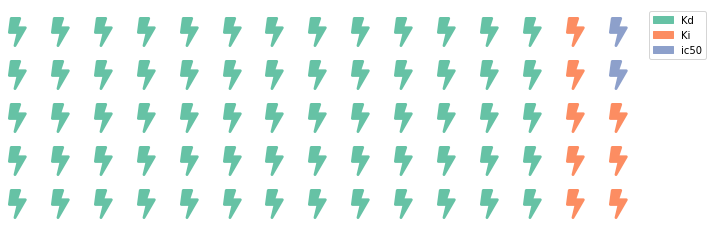

In [ ]:
from pywaffle import Waffle



fig = plt.figure(figsize=(10,6),
                FigureClass=Waffle,
                rows=5,
                columns=15,
                icons='bolt',
                icon_size=30,
                values=afinidade, 
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1.0, 1)}
               )



plt.show();

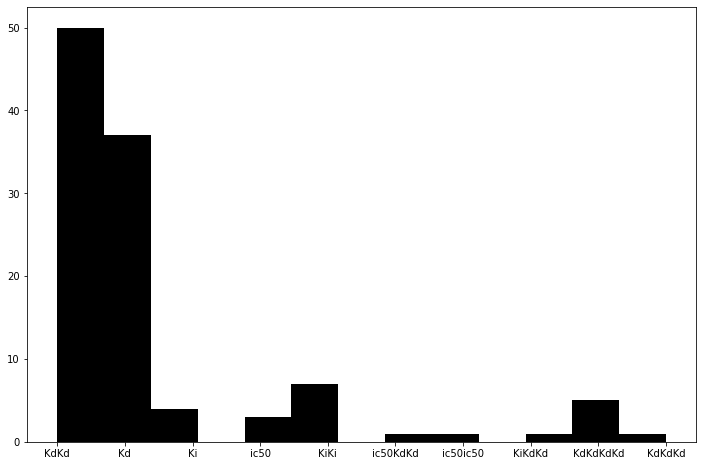

In [50]:

base = (pep.groupby('affinity_value')['affinity_measure'].sum())
plt.figure(figsize=(12,8))
plt.hist(base,color='k', bins = 13);

In [ ]:

!wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
!time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

In [73]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [85]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

In [105]:
smile = pep['ligand_smiles'][0].upper()
smile

'O=C(NC(C(=O)NC(C(=O)NC(C(=O)NC(C=O)CC1CCCCC1)CC1CCCCC1)CCCC[N+H3])CC1CCC(O)CC1)C(NC(=O)C1N(C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C[N+H3])CC2CCC(O)CC2)CCC(=O)[O-])CC(=O)N)CCC1)C(O)C'

In [117]:
# O código smile da base de dados não está funcionando, apresenta esse erro abaixo

mol = Chem.MolFromSmiles(smile)

RDKit ERROR: [03:46:41] SMILES Parse Error: syntax error while parsing: O=C(NC(C(=O)NC(C(=O)NC(C(=O)NC(C=O)CC1CCCCC1)CC1CCCCC1)CCCC[N+H3])CC1CCC(O)CC1)C(NC(=O)C1N(C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C[N+H3])CC2CCC(O)CC2)CCC(=O)[O-])CC(=O)N)CCC1)C(O)C
RDKit ERROR: [03:46:41] SMILES Parse Error: Failed parsing SMILES 'O=C(NC(C(=O)NC(C(=O)NC(C(=O)NC(C=O)CC1CCCCC1)CC1CCCCC1)CCCC[N+H3])CC1CCC(O)CC1)C(NC(=O)C1N(C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C[N+H3])CC2CCC(O)CC2)CCC(=O)[O-])CC(=O)N)CCC1)C(O)C' for input: 'O=C(NC(C(=O)NC(C(=O)NC(C(=O)NC(C=O)CC1CCCCC1)CC1CCCCC1)CCCC[N+H3])CC1CCC(O)CC1)C(NC(=O)C1N(C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C[N+H3])CC2CCC(O)CC2)CCC(=O)[O-])CC(=O)N)CCC1)C(O)C'


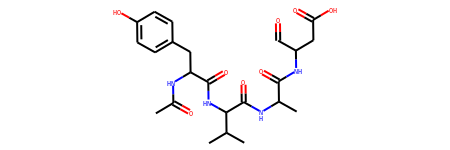

In [113]:
#Estrutura encontrada no Pubchem, não perence a base de dados

mol = Chem.MolFromSmiles('CC(C)C(C(=O)NC(C)C(=O)NC(CC(=O)O)C=O)NC(=O)C(CC1=CC=C(C=C1)O)NC(=O)C')
mol




In [115]:
mw = Descriptors.MolWt(mol)
mw

492.5290000000002